In [1]:
# Importing required libraries and modules

import mlflow  # Library for managing the machine learning lifecycle (experiment tracking, reproducibility, deployment)
import pandas as pd  # Library for data manipulation and analysis
import numpy as np  # Library for numerical operations
import matplotlib.pyplot as plt  # Library for creating static, interactive, and animated visualizations
import seaborn as sns  # Library for statistical data visualization built on matplotlib

# Importing functions for splitting datasets, cross-validation, and hyperparameter tuning
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# Importing StandardScaler for feature scaling
from sklearn.preprocessing import StandardScaler

# Importing performance evaluation metrics
from sklearn.metrics import (
    accuracy_score,  # To calculate the accuracy of a model
    f1_score,  # To calculate the F1 score (harmonic mean of precision and recall)
    precision_score,  # To calculate the precision of a model
    recall_score,  # To calculate the recall of a model
    confusion_matrix,  # To compute the confusion matrix
    classification_report  # To generate a comprehensive classification report
)

# Importing machine learning models
from sklearn.linear_model import LogisticRegression  # Logistic regression classifier
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting Classifier
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier

# Importing a utility for plotting learning curves
from sklearn.model_selection import learning_curve

# Setting pandas options to display all columns in DataFrame outputs
pd.set_option('display.max_columns', None)  # Ensure no column is hidden in console output


/Users/mikosa/tensor/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# Load the dataset from a CSV file into a Pandas DataFrame
data = pd.read_csv('data/hybrid_audience.csv')  

# Display the first 5 rows of the DataFrame to inspect the data
data.head()


,User_ID,Age,Gender,Location,Device_Type,Ad_Platform,Viewing_Hours,Clicks,Purchase_Made,Income,Ad_Spent,Demographic_Group,Frequency,Engagement_Score
0,1,48.0,Male,Rural,Desktop,Streaming,4.207828,4,No,101069.466456,173.510714,D,5,12.813300
1,2,35.0,Male,Suburban,Desktop,Streaming,3.480265,2,Yes,72834.388787,133.855251,D,9,78.744859
2,3,39.0,Other,Suburban,Tablet,Digital,2.178991,1,No,31738.387343,236.298090,B,18,3.582487
3,4,35.0,Male,Suburban,Mobile,Social Media,8.412010,2,No,112039.137105,825.804793,B,5,80.571119
4,5,62.0,Other,Rural,Desktop,Digital,7.924670,6,No,122755.391331,524.238812,B,12,38.841344


In [3]:
# Display a concise summary of the DataFrame, including data types and non-null counts
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   User_ID            10000 non-null  int64  
 1   Age                9781 non-null   float64
 2   Gender             10000 non-null  object 
 3   Location           10000 non-null  object 
 4   Device_Type        10000 non-null  object 
 5   Ad_Platform        10000 non-null  object 
 6   Viewing_Hours      9700 non-null   float64
 7   Clicks             10000 non-null  int64  
 8   Purchase_Made      10000 non-null  object 
 9   Income             9500 non-null   float64
 10  Ad_Spent           10000 non-null  float64
 11  Demographic_Group  10000 non-null  object 
 12  Frequency          10000 non-null  int64  
 13  Engagement_Score   9600 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 1.1+ MB


In [4]:
# Identify numerical columns with float64 or int64 data types, excluding 'User_ID'
num_cols = [col for col in data.columns if data[col].dtypes in ['float64', 'int64'] and col != 'User_ID']

# Identify categorical columns with object data type, excluding 'User_ID' and 'Purchase_Made'
cat_cols = [col for col in data.columns if data[col].dtypes == 'object' and col not in ['User_ID', 'Purchase_Made']]


In [5]:
data[num_cols].describe()

,Age,Viewing_Hours,Clicks,Income,Ad_Spent,Frequency,Engagement_Score
count,9781.000000,9700.000000,10000.000000,9500.000000,10000.000000,10000.000000,9600.000000
mean,41.599734,5.029015,2.007300,85240.692603,550.063480,10.024600,49.681939
std,13.779300,2.891281,1.432708,37508.728756,259.102558,5.496291,28.790180
min,18.000000,0.000933,0.000000,20043.042483,100.206010,1.000000,0.001577
25%,30.000000,2.525650,1.000000,52540.291551,325.094102,5.000000,24.797506
50%,41.000000,5.026289,2.000000,85688.114772,551.482398,10.000000,49.063309
75%,53.000000,7.558153,3.000000,117427.965452,771.428236,15.000000,74.376061
max,65.000000,9.998090,9.000000,149988.557370,999.925258,19.000000,99.991726


In [6]:
# Generate descriptive statistics for numerical columns in the DataFrame
data.describe()

,User_ID,Age,Viewing_Hours,Clicks,Income,Ad_Spent,Frequency,Engagement_Score
count,10000.00000,9781.000000,9700.000000,10000.000000,9500.000000,10000.000000,10000.000000,9600.000000
mean,5000.50000,41.599734,5.029015,2.007300,85240.692603,550.063480,10.024600,49.681939
std,2886.89568,13.779300,2.891281,1.432708,37508.728756,259.102558,5.496291,28.790180
min,1.00000,18.000000,0.000933,0.000000,20043.042483,100.206010,1.000000,0.001577
25%,2500.75000,30.000000,2.525650,1.000000,52540.291551,325.094102,5.000000,24.797506
50%,5000.50000,41.000000,5.026289,2.000000,85688.114772,551.482398,10.000000,49.063309
75%,7500.25000,53.000000,7.558153,3.000000,117427.965452,771.428236,15.000000,74.376061
max,10000.00000,65.000000,9.998090,9.000000,149988.557370,999.925258,19.000000,99.991726


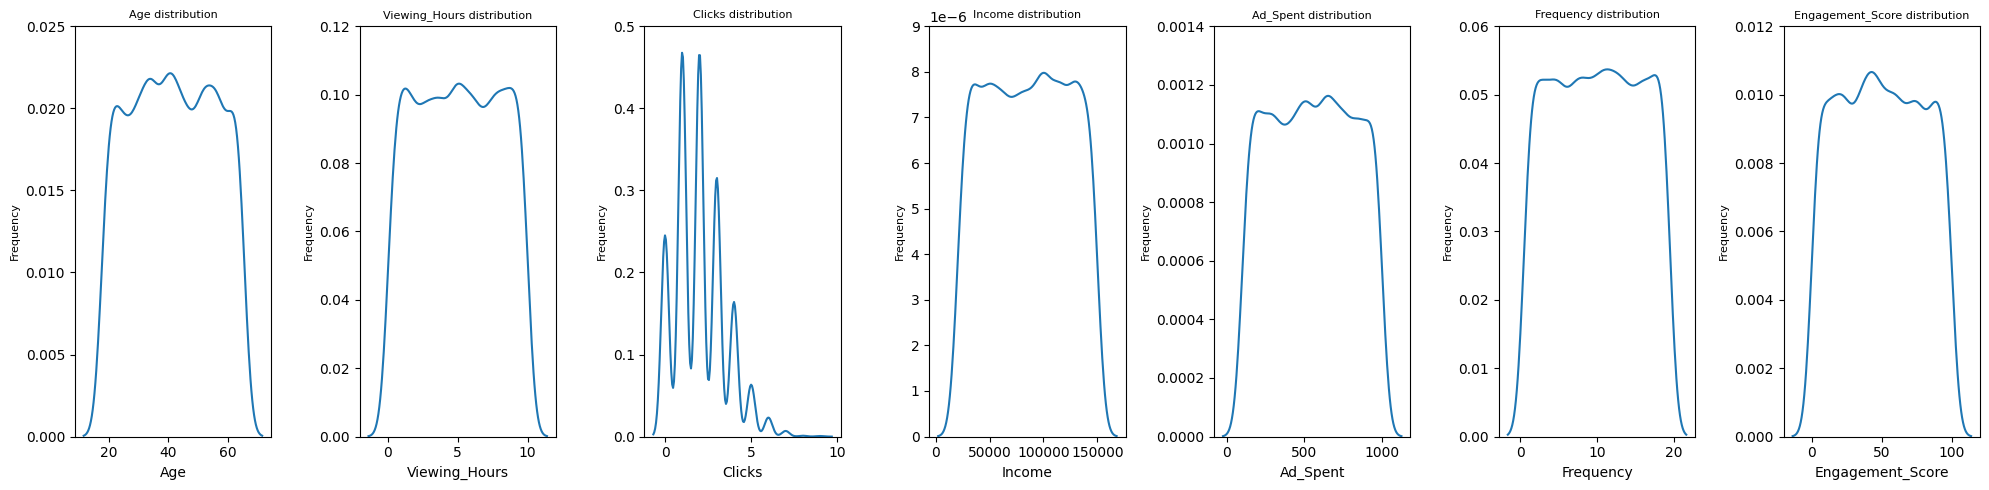

In [7]:
# Create a figure with subplots for each numerical column
fig, ax = plt.subplots(
    nrows=1,               # Arrange subplots in one row
    ncols=len(num_cols),   # Number of columns equals the number of numerical columns
    figsize=(20, 5)        # Set the overall figure size
)

# Loop through each numerical column and its corresponding subplot
for id, col in enumerate(num_cols):
    # Plot a Kernel Density Estimate (KDE) for the column
    sns.kdeplot(data=data, x=col, ax=ax[id])
    # Set y-axis ticks for better visibility
    ax[id].set_yticks(ax[id].get_yticks())
    # Adjust the size of the y-axis tick labels
    ax[id].tick_params(axis='y', labelsize=10)
    # Set a title for the subplot indicating the column name
    ax[id].set_title(f'{col} distribution', fontsize=8)
    # Label the y-axis as 'Frequency'
    ax[id].set_ylabel('Frequency', fontsize=8)

# Adjust subplot spacing to prevent overlapping of elements
plt.tight_layout()


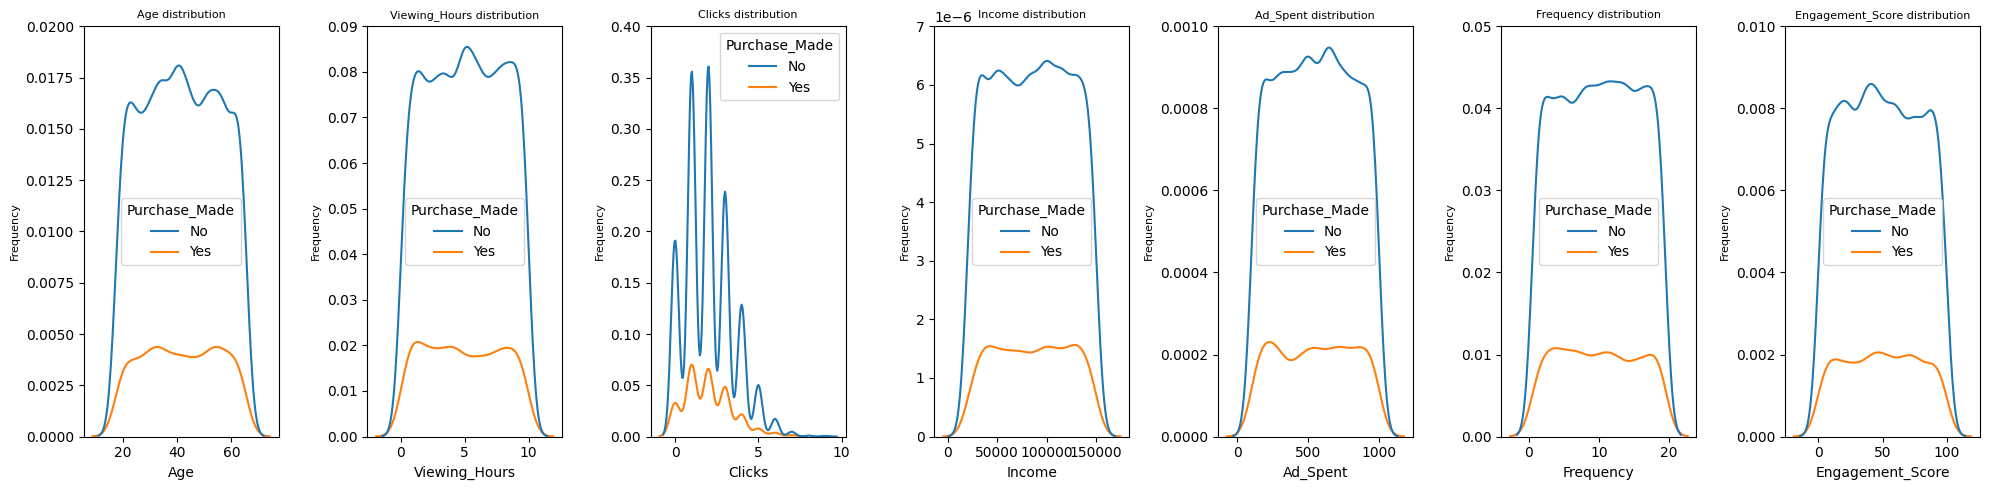

In [8]:
# Create a figure with subplots for each numerical column
fig, ax = plt.subplots(
    nrows=1,               # Arrange subplots in one row
    ncols=len(num_cols),   # Number of columns equals the number of numerical columns
    figsize=(20, 5)        # Set the overall figure size
)

# Loop through each numerical column and its corresponding subplot
for id, col in enumerate(num_cols):
    # Plot a Kernel Density Estimate (KDE) for the column, differentiated by 'Purchase_Made'
    sns.kdeplot(data=data, x=col, hue='Purchase_Made', ax=ax[id])
    # Set y-axis ticks for better visibility
    ax[id].set_yticks(ax[id].get_yticks())
    # Adjust the size of the y-axis tick labels
    ax[id].tick_params(axis='y', labelsize=10)
    # Set a title for the subplot indicating the column name
    ax[id].set_title(f'{col} distribution', fontsize=8)
    # Label the y-axis as 'Frequency'
    ax[id].set_ylabel('Frequency', fontsize=8)

# Adjust subplot spacing to prevent overlapping of elements
plt.tight_layout()


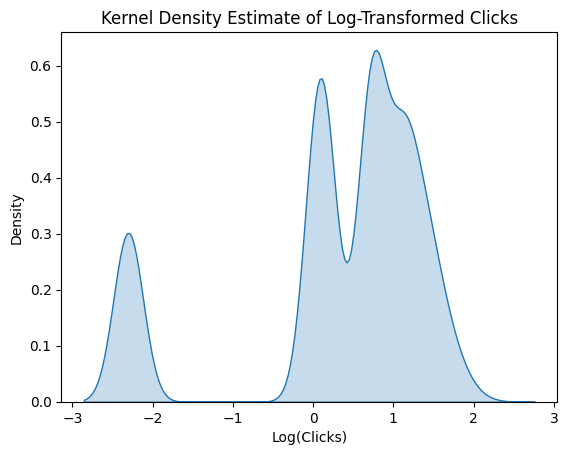

In [9]:
# Apply a log transformation to the 'Clicks' column and plot the KDE
sns.kdeplot(x=np.log(data['Clicks'] + 0.1), fill=True)  # Adding 0.1 to avoid log(0), which is undefined

# Customize plot appearance
plt.title('Kernel Density Estimate of Log-Transformed Clicks')  # Set the title of the plot
plt.xlabel('Log(Clicks)')  # Label the x-axis
plt.ylabel('Density')  # Label the y-axis

# Show the plot
plt.show()  # Display the plot

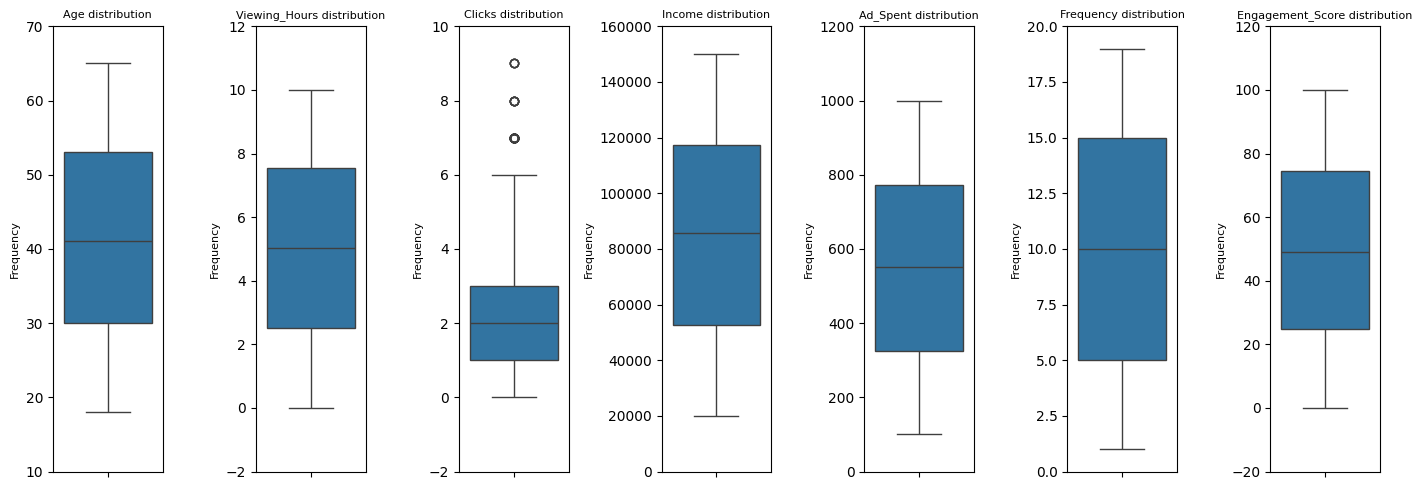

In [10]:
# Create a figure with subplots for each numerical column
fig, ax = plt.subplots(
    nrows=1,               # Arrange subplots in one row
    ncols=len(num_cols),   # Number of columns equals the number of numerical columns
    figsize=(14, 5)        # Set the overall figure size
)

# Loop through each numerical column and its corresponding subplot
for id, col in enumerate(num_cols):
    # Plot a boxplot for the column to visualize its distribution
    sns.boxplot(data=data, y=col, ax=ax[id])
    # Set y-axis ticks for better visibility
    ax[id].set_yticks(ax[id].get_yticks())
    # Adjust the size of the y-axis tick labels
    ax[id].tick_params(axis='y', labelsize=10)
    # Set a title for the subplot indicating the column name
    ax[id].set_title(f'{col} distribution', fontsize=8)
    # Label the y-axis as 'Frequency' (although boxplots usually represent values)
    ax[id].set_ylabel('Frequency', fontsize=8)

# Adjust subplot spacing to prevent overlapping of elements
plt.tight_layout()


<Axes: ylabel='Clicks'>

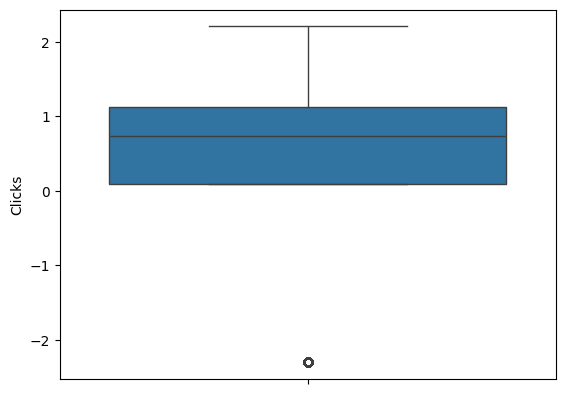

In [11]:
sns.boxplot(data = np.log(data['Clicks']+ 0.1))

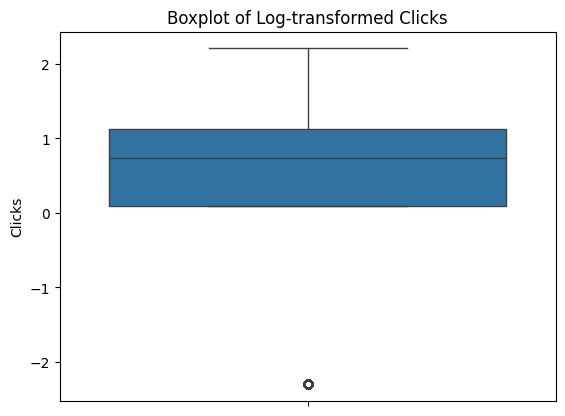

In [12]:
# Plot a boxplot for the log-transformed 'Clicks' column
sns.boxplot(data=np.log(data['Clicks'] + 0.1))  # Apply log transformation and plot the boxplot
# Customize the plot
plt.title('Boxplot of Log-transformed Clicks')  # Set the title of the plot
# Display the plot
plt.show()  # Show the plot to the user


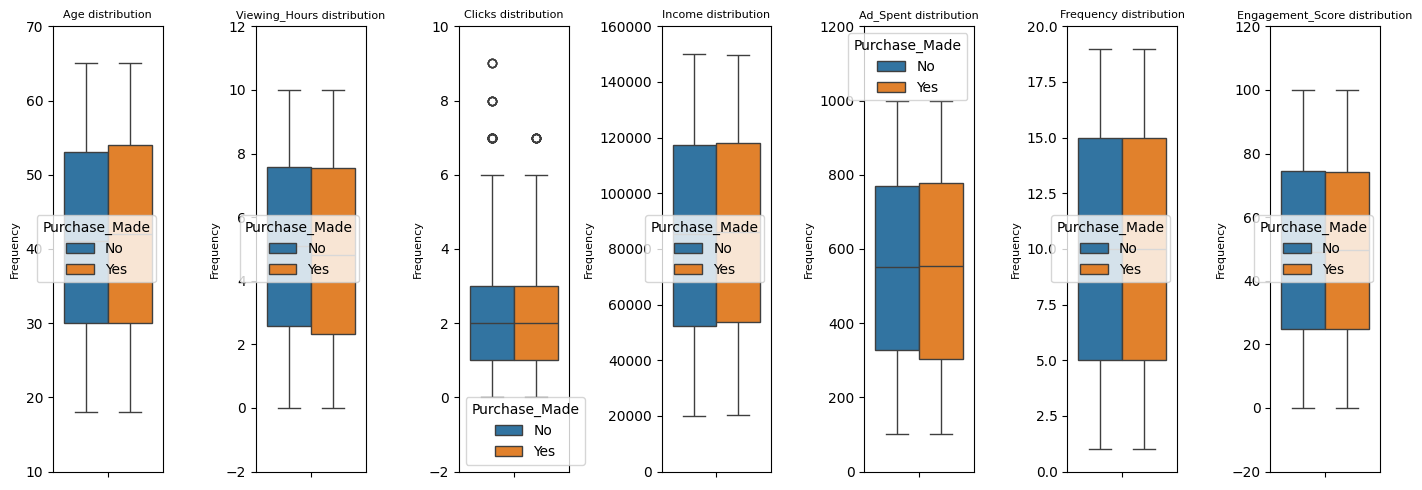

In [13]:
# Create a figure with subplots for each numerical column, separated by 'Purchase_Made' hue
fig, ax = plt.subplots(
    nrows=1,               # Arrange subplots in one row
    ncols=len(num_cols),   # Number of columns equals the number of numerical columns
    figsize=(14, 5)        # Set the overall figure size
)

# Loop through each numerical column and its corresponding subplot
for id, col in enumerate(num_cols):
    # Plot a boxplot for the column, separated by 'Purchase_Made' hue
    sns.boxplot(data=data, y=col, hue='Purchase_Made', ax=ax[id])
    # Set y-axis ticks for better visibility
    ax[id].set_yticks(ax[id].get_yticks())
    # Adjust the size of the y-axis tick labels
    ax[id].tick_params(axis='y', labelsize=10)
    # Set a title for the subplot indicating the column name
    ax[id].set_title(f'{col} distribution', fontsize=8)
    # Label the y-axis as 'Frequency' (although boxplots usually represent values)
    ax[id].set_ylabel('Frequency', fontsize=8)

# Adjust subplot spacing to prevent overlapping of elements
plt.tight_layout()


In [14]:
data[cat_cols].describe()

,Gender,Location,Device_Type,Ad_Platform,Demographic_Group
count,10000,10000,10000,10000,10000
unique,3,3,3,4,4
top,Female,Urban,Desktop,Streaming,B
freq,3340,3408,3447,2516,2560


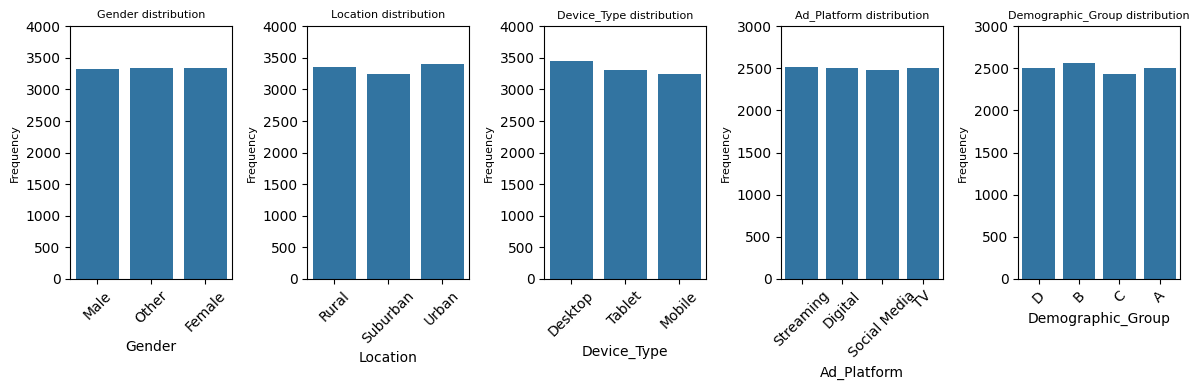

In [15]:
# Create a figure with subplots for each categorical column
fig, ax = plt.subplots(
    nrows=1,               # Arrange subplots in one row
    ncols=len(cat_cols),   # Number of columns equals the number of categorical columns
    figsize=(12, 4)        # Set the overall figure size
)

# Loop through each categorical column and its corresponding subplot
for id, col in enumerate(cat_cols):
    # Plot a countplot for the column
    sns.countplot(data=data, x=col, ax=ax[id])
    # Set y-axis ticks for better visibility
    ax[id].set_yticks(ax[id].get_yticks())
    # Rotate the x-axis tick labels to avoid overlap (useful for longer category names)
    ax[id].tick_params(axis='x', rotation=45)
    # Adjust the size of the y-axis tick labels for clarity
    ax[id].tick_params(axis='y', labelsize=10)
    # Set a title for each subplot indicating the column name
    ax[id].set_title(f'{col} distribution', fontsize=8)
    # Label the y-axis as 'Frequency'
    ax[id].set_ylabel('Frequency', fontsize=8)

# Adjust subplot spacing to prevent overlapping of elements
plt.tight_layout()


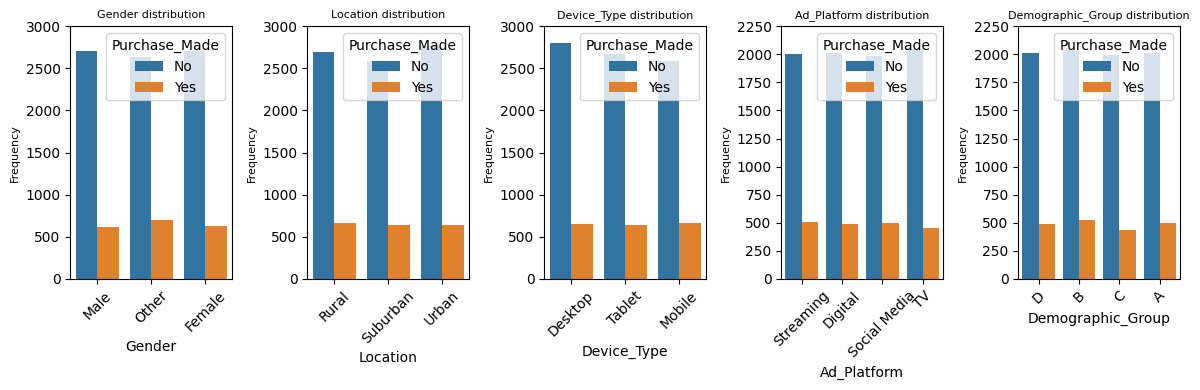

In [16]:
# Create a figure with subplots for each categorical column, displaying the distribution of Purchase_Made
fig, ax = plt.subplots(
    nrows=1,               # Arrange subplots in one row
    ncols=len(cat_cols),   # Number of columns equals the number of categorical columns
    figsize=(12, 4)        # Set the overall figure size
)

# Loop through each categorical column and its corresponding subplot
for id, col in enumerate(cat_cols):
    # Plot a countplot for the column, grouped by 'Purchase_Made' for comparison
    sns.countplot(data=data, x=col, hue='Purchase_Made', ax=ax[id])
    # Set y-axis ticks for better visibility
    ax[id].set_yticks(ax[id].get_yticks())
    # Rotate the x-axis tick labels to avoid overlap (useful for longer category names)
    ax[id].tick_params(axis='x', rotation=45)
    # Adjust the size of the y-axis tick labels for clarity
    ax[id].tick_params(axis='y', labelsize=10)
    # Set a title for each subplot indicating the column name
    ax[id].set_title(f'{col} distribution', fontsize=8)
    # Label the y-axis as 'Frequency'
    ax[id].set_ylabel('Frequency', fontsize=8)

# Adjust subplot spacing to prevent overlapping of elements
plt.tight_layout()


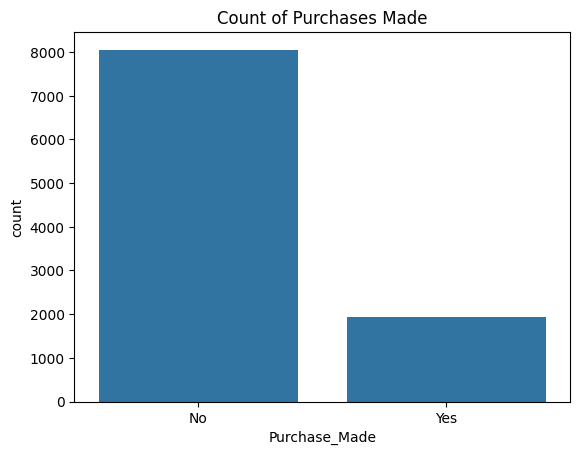

In [17]:
# Create a countplot to show the distribution of the 'Purchase_Made' column
sns.countplot(x='Purchase_Made', data=data)
# Set the title of the plot
plt.title('Count of Purchases Made')
# Display the plot
plt.show()

In [18]:
# Loop through each numeric column in the dataset
for col in num_cols:
    # Fill missing values in the column with the median value of that column
    data[col] = data[col].fillna(data[col].median())

In [19]:
data.shape

(10000, 14)

In [20]:
# Initialize an empty dictionary to store the encoding mappings for categorical columns
encoding = {}

# Loop through each categorical column in the dataset
for col in cat_cols:
    # Get the normalized value counts of the categorical column, sorted in descending order
    val_counts = data[col].value_counts(normalize=True, ascending=False).items()
    # Create an encoding dictionary for the column, mapping each category to an index starting from 1
    encoding[col] = {category: idx for idx, (category, _) in enumerate(val_counts, 1)}
    # Map the categories in the column to the corresponding indices
    data[col] = data[col].map(encoding[col])


In [21]:
data.head()

,User_ID,Age,Gender,Location,Device_Type,Ad_Platform,Viewing_Hours,Clicks,Purchase_Made,Income,Ad_Spent,Demographic_Group,Frequency,Engagement_Score
0,1,48.0,3,2,1,1,4.207828,4,No,101069.466456,173.510714,3,5,12.813300
1,2,35.0,3,3,1,1,3.480265,2,Yes,72834.388787,133.855251,3,9,78.744859
2,3,39.0,2,3,2,3,2.178991,1,No,31738.387343,236.298090,1,18,3.582487
3,4,35.0,3,3,3,4,8.412010,2,No,112039.137105,825.804793,1,5,80.571119
4,5,62.0,2,2,1,3,7.924670,6,No,122755.391331,524.238812,1,12,38.841344


In [22]:
# Calculate the 75th percentile (Q3) and 25th percentile (Q1) of the 'Clicks' column
Q3 = data['Clicks'].quantile(0.75)
Q1 = data['Clicks'].quantile(0.25)
# Compute the Interquartile Range (IQR)
IQR = Q3 - Q1
# Define the upper and lower bounds for outlier detection
upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR
# Filter the data by keeping only the rows where 'Clicks' is within the upper and lower bounds
data = data[(data['Clicks'] < upper) & (data['Clicks'] > lower)]


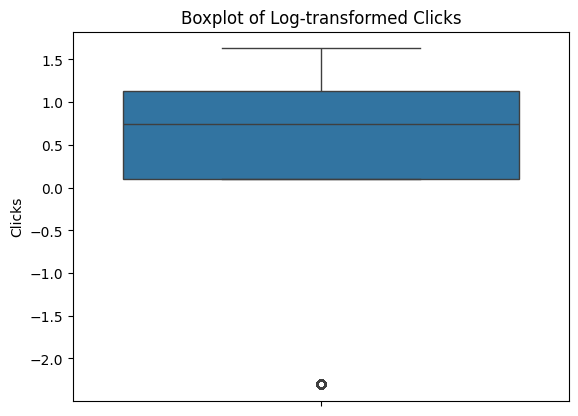

In [23]:
# Create a boxplot of the log-transformed 'Clicks' column
# Adding 0.1 to avoid log(0) which would result in NaN
sns.boxplot(data=np.log(data['Clicks'] + 0.1))
# Adding a title to the boxplot
plt.title('Boxplot of Log-transformed Clicks')
# Display the plot
plt.show()

In [24]:
# Initialize the StandardScaler
stand = StandardScaler()
# Apply the StandardScaler to the numerical columns to standardize the data
# This will scale the features to have a mean of 0 and a standard deviation of 1
data[num_cols] = stand.fit_transform(data[num_cols])


In [25]:
# Map the 'Purchase_Made' column to binary values: 'No' -> 0, 'Yes' -> 1
data['Purchase_Made'] = data['Purchase_Made'].map({'No': 0, 'Yes': 1})

In [26]:
data.head()

,User_ID,Age,Gender,Location,Device_Type,Ad_Platform,Viewing_Hours,Clicks,Purchase_Made,Income,Ad_Spent,Demographic_Group,Frequency,Engagement_Score
0,1,0.471492,3,2,1,1,-0.288518,1.576450,0,0.434410,-1.454013,3,-0.912638,-1.308024
1,2,-0.482349,3,3,1,1,-0.544057,0.055306,1,-0.338141,-1.607104,3,-0.185239,1.029857
2,3,-0.188860,2,3,2,3,-1.001097,-0.705266,0,-1.462586,-1.211619,1,1.451409,-1.635341
3,4,-0.482349,3,3,3,4,1.188096,0.055306,0,0.734556,1.064201,1,-0.912638,1.094615
5,6,-0.702467,1,3,1,2,-0.416562,-0.705266,0,1.156322,-0.561977,4,0.360310,1.576101


In [27]:
# Count the occurrences of each value in the 'Purchase_Made' column (0 and 1)
count_0, count_1 = data['Purchase_Made'].value_counts()
# Create separate dataframes for each class: 'No' (0) and 'Yes' (1) in the 'Purchase_Made' column
data_0 = data[data['Purchase_Made'] == 0]  # Data where 'Purchase_Made' is 0 (No)
data_1 = data[data['Purchase_Made'] == 1]  # Data where 'Purchase_Made' is 1 (Yes)


In [28]:
# Oversample the minority class (Purchase_Made == 1) to match the size of the majority class (Purchase_Made == 0)
data_oversampled = data_1.sample(count_0, replace=True)
# Concatenate the majority class data (data_0) with the oversampled minority class data (data_oversampled) to create a balanced dataset
train = pd.concat([data_0, data_oversampled])


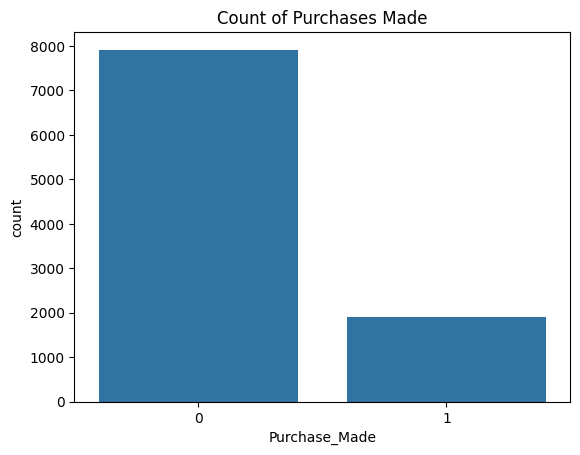

In [29]:
# Create a countplot to show the distribution of the 'Purchase_Made' column
sns.countplot(x='Purchase_Made', data=data)
# Set the title of the plot
plt.title('Count of Purchases Made')
# Display the plot
plt.show()

In [30]:
# Drop 'User_ID' and 'Purchase_Made' columns from the training dataset to create the feature set (feat_col)
feat_col = train.drop(labels=['User_ID', 'Purchase_Made'], axis=1)
# Set the target variable (target) as the 'Purchase_Made' column from the training dataset
target = train['Purchase_Made']


In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(feat_col, target, test_size=0.25, random_state=45)


Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.49      0.52      0.51      1966
           1       0.50      0.46      0.48      1991

    accuracy                           0.49      3957
   macro avg       0.49      0.49      0.49      3957
weighted avg       0.49      0.49      0.49      3957





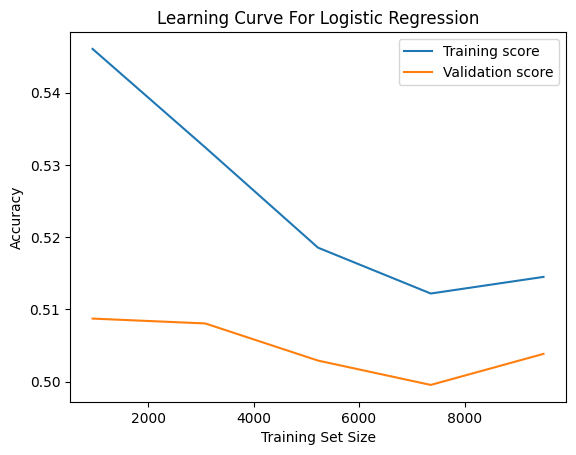

2024/11/22 21:15:54 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.95      0.78      0.86      1966
           1       0.81      0.96      0.88      1991

    accuracy                           0.87      3957
   macro avg       0.88      0.87      0.87      3957
weighted avg       0.88      0.87      0.87      3957





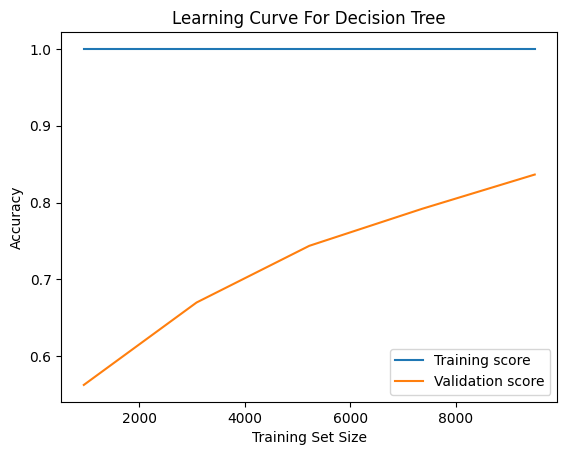

2024/11/22 21:15:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



Classification Report for Gradient Boosting Classifier
              precision    recall  f1-score   support

           0       0.61      0.58      0.60      1966
           1       0.61      0.63      0.62      1991

    accuracy                           0.61      3957
   macro avg       0.61      0.61      0.61      3957
weighted avg       0.61      0.61      0.61      3957





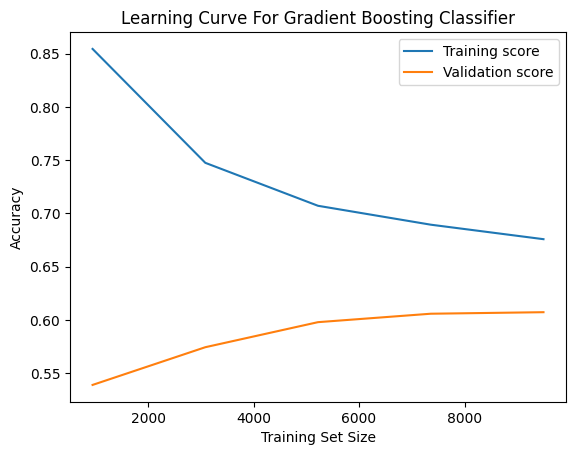

2024/11/22 21:16:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Classification Report for GridSearchCV
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1966
           1       1.00      0.95      0.98      1991

    accuracy                           0.98      3957
   macro avg       0.98      0.98      0.98      3957
weighted avg       0.98      0.98      0.98      3957





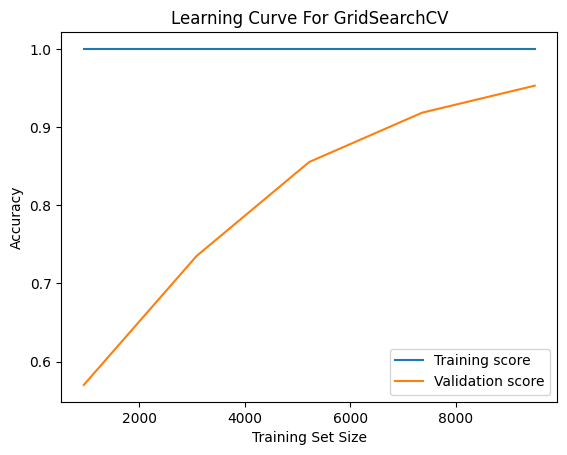

2024/11/22 21:43:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [ ]:
# Iterate through different models to evaluate and log results in MLflow
for name in ['Logistic Regression', 'Decision Tree', 'Gradient Boosting Classifier', 'GridSearchCV']:
    with mlflow.start_run(run_name=f"run_{name}"):
        
        # Define models to use
        models = {
            'Logistic Regression': LogisticRegression(),
            'Decision Tree': DecisionTreeClassifier(),
            'Gradient Boosting Classifier': GradientBoostingClassifier()
        }
        
        # If the model is in the predefined list, fit and evaluate it
        if name in models:
            my_model = models[name]
            my_model.fit(X_train, Y_train)  # Train the model
            y_pred = my_model.predict(X_test)  # Predict on the test set
            
            # Calculate performance metrics
            train_scores = my_model.score(X_train, Y_train)
            test_score = my_model.score(X_test, Y_test)
            f1 = f1_score(Y_test, y_pred)
            recall = recall_score(Y_test, y_pred)
            precision = precision_score(Y_test, y_pred)

            print(f'\nClassification Report for {name}')
            print(classification_report(Y_test, y_pred))  # Print the classification report
            print('\n')

            # Generate and plot the learning curve
            train_sizes, train_scores1, test_scores1 = learning_curve(
                my_model, X_train, Y_train, cv=5, scoring='accuracy'
            )

            plt.plot(train_sizes, train_scores1.mean(axis=1), label='Training score')
            plt.plot(train_sizes, test_scores1.mean(axis=1), label='Validation score')
            plt.xlabel('Training Set Size')
            plt.ylabel('Accuracy')
            plt.legend(loc='best')
            plt.title(f'Learning Curve For {name}')
            plt.show()

            # # Log metrics to MLflow
            # mlflow.log_metric(f'{name}_Training_score', float(train_scores))
            # mlflow.log_metric(f'{name}_Test_score', float(test_score))
            # mlflow.log_metric(f'{name}_F1_score', float(f1))
            # mlflow.log_metric(f'{name}_Recall_score', float(recall))
            # mlflow.log_metric(f'{name}_Precision_score', float(precision))
            # mlflow.sklearn.log_model(my_model, name)  # Log the trained model
            
        # If the model is GridSearchCV, apply hyperparameter tuning
        else:
            param_grid = {
                'n_estimators': [50, 100, 200],
                'max_depth': [None, 10, 20, 30],
                'min_samples_split': [2, 5, 10],
                'min_samples_leaf': [1, 2, 4],
                'max_features': ['sqrt', 'log2']
            }

            # Perform GridSearchCV with cross-validation
            cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            grad = GradientBoostingClassifier()
            grid_search = GridSearchCV(
                estimator=grad, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1, verbose=1
            )
            grid_search.fit(X_train, Y_train)  # Fit the grid search model
            best_param = grid_search.best_params_  # Get the best parameters
            best_model = grid_search.best_estimator_  # Get the best model

            # Make predictions and calculate metrics
            y_pred = best_model.predict(X_test)
            train_scores = best_model.score(X_train, Y_train)
            test_score = best_model.score(X_test, Y_test)
            f1 = f1_score(Y_test, y_pred)
            recall = recall_score(Y_test, y_pred)
            precision = precision_score(Y_test, y_pred)

            print(f'Classification Report for GridSearchCV')
            print(classification_report(Y_test, y_pred))  # Print classification report
            print('\n')

            # Plot learning curve for the best model
            train_sizes, train_scores_, test_scores_ = learning_curve(
                best_model, X_train, Y_train, cv=5, scoring='accuracy'
            )

            plt.plot(train_sizes, train_scores_.mean(axis=1), label='Training score')
            plt.plot(train_sizes, test_scores_.mean(axis=1), label='Validation score')
            plt.xlabel('Training Set Size')
            plt.ylabel('Accuracy')
            plt.legend(loc='best')
            plt.title(f'Learning Curve For GridSearchCV')
            plt.show()

            # Log results and parameters for the best model in MLflow
            mlflow.log_metric(f'GridSearchCV_Training_score', train_scores)
            mlflow.log_metric(f'GridSearchCV_Test_score', test_score)
            mlflow.log_metric(f'GridSearchCV_F1_score', f1)
            mlflow.log_metric(f'GridSearchCV_Recall_score', recall)
            mlflow.log_metric(f'GridSearchCV_Precision_score', precision)
            mlflow.log_params(params=best_param)  # Log the best hyperparameters
            mlflow.sklearn.log_model(best_model, 'GridSearchCV_GradientBoost')  # Log the best model